In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ============================================================
# PHASE 1: DATA PREPARATION
# ============================================================

In [3]:
df=pd.read_csv('mnist.csv')
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset Information:")
df.info()
print("\nStatistical Summary of the dataset:")
display(df.describe())
print("\nChecking for missing values:")
display(df.isnull().sum())
print("\nChecking for duplicates:")
display(df.duplicated().sum())
# Separating features and target variable
X = df.drop('label', axis=1)
y = df['label']
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
# normalizing the feature data
X_normalized = X / 255.0
print("\nFirst 5 rows of the normalized features:")
display(X_normalized.head())
# Flatten images for logistic regression
X_flattened = X_normalized.values
print(f"\nFlattened features shape: {X_flattened.shape}")
# The data is already flattened since each row represents an image so we don't need to reshape further
print("\nData preprocessing completed.")

# Binary classification: Digit '0' vs. Not '0'
mask = (y == 0) | (y == 1)
X_binary = X_flattened[mask]
y_binary = y[mask]
# Splitting the dataset into training and testing and validation sets
X_temp_b, X_train_b, y_temp_b, y_train_b = train_test_split(X_binary, y_binary, test_size=0.6, random_state=42,shuffle=True)
X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(X_temp_b, y_temp_b, test_size=0.5, random_state=42,shuffle=True)
print(f"\nTraining set shape: {X_train_b.shape}, {y_train_b.shape}")
print(f"Validation set shape: {X_val_b.shape}, {y_val_b.shape}")
print(f"Testing set shape: {X_test_b.shape}, {y_test_b.shape}")


First 5 rows of the dataset:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.2 MB

Statistical Summary of the dataset:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0



Checking for missing values:


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


Checking for duplicates:


np.int64(0)


Features shape: (70000, 784)
Target shape: (70000,)

First 5 rows of the normalized features:


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Flattened features shape: (70000, 784)

Data preprocessing completed.

Training set shape: (8868, 784), (8868,)
Validation set shape: (2956, 784), (2956,)
Testing set shape: (2956, 784), (2956,)


In [4]:
# Creating a custom Dataset class

# 1 convert Numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train_b, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_b.values, dtype=torch.long).reshape(-1,1)

X_val_tensor = torch.tensor(X_val_b, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_b.values, dtype=torch.long).reshape(-1,1)

X_test_tensor = torch.tensor(X_test_b, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_b.values, dtype=torch.long).reshape(-1,1)

# 2 create a custom Dataset class
class MNISTDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    
# 3 create Dataset instances

Batch_size = 64
train_dataset = MNISTDataset(X_train_tensor, y_train_tensor)
val_dataset = MNISTDataset(X_val_tensor, y_val_tensor)
test_dataset = MNISTDataset(X_test_tensor, y_test_tensor)

# 4 create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=Batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=Batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=Batch_size, shuffle=False)
print("\nDataLoaders created:")
print(f" - Training batches: {len(train_loader)}")
print(f" - Validation batches: {len(val_loader)}")
print(f" - Testing batches: {len(test_loader)}")    


DataLoaders created:
 - Training batches: 139
 - Validation batches: 47
 - Testing batches: 47



# ============================================================
# PHASE 2: MODEL INITIALIZATION
# ============================================================

In [5]:
N = len(train_loader.dataset)
D = X_train_tensor.shape[1]

print(f"\nNumber of training samples: {N}")
print(f"Number of features: {D}")

w = torch.zeros(D, 1, dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

print(f"\nInitial weights: {w}")
print(f"Initial bias: {b}")

learning_rate=0.01
num_epochs=20

print(f"\nLearning rate: {learning_rate}")



Number of training samples: 8868
Number of features: 784

Initial weights: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],


# ============================================================
# PHASE 3: DEFINE KEY FUNCTIONS
# ============================================================

In [6]:
def sigmoid(z):
    """Formula: σ(z) = 1 / (1 + e^(-z))"""
    return 1.0 / (1.0 + np.exp(-z))


def compute_predictions(X,w,b):
    """Compute the predicted probabilities using the logistic function."""
    z = torch.matmul(X, w) + b
    return sigmoid(z)



def binary_cross_entropy_loss(y, t):
    """
    Computes binary cross-entropy.
    y = predicted probabilities [N, 1]
    t = true labels (0 or 1) [N, 1]
    """
    epsilon = 1e-15  # to avoid log(0)
    y_clipped = torch.clamp(y, epsilon, 1 - epsilon)
    # loss = - [ t*log(y) + (1-t)*log(1-y) ]
    loss = -t * torch.log(y_clipped) - (1 - t) * torch.log(1 - y_clipped)
    return loss


def compute_cost(X, t, w, b):
    """Computes the average binary cross-entropy cost."""
    y = compute_predictions(X, w, b)
    losses = binary_cross_entropy_loss(y, t)
    cost = torch.mean(losses)
    return cost



def compute_gradients(X, t, w, b):
    """
    Computes gradients for w and b.
    y = predicted probabilities [N, 1]
    t = true labels (0 or 1) [N, 1]
    """
    N = len(t)
    y = compute_predictions(X, w, b)
    
    # errors = y - t
    errors = y - t  # Shape (N, 1)
    
    # grad_w = (1/N) * X.T @ errors
    grad_w = torch.matmul(X.T, errors) / N  # Shape (D, 1)
    
    # grad_b = (1/N) * sum(errors)
    grad_b = torch.sum(errors) / N  # Shape (1,)
    
    return grad_w, grad_b


def compute_accuracy(X, t, w, b):
    """
    Computes classification accuracy.
    X = features, t = true labels (0 or 1)
    """
    # Get predicted probabilities [N, 1]
    y = compute_predictions(X, w, b)
    
    # Convert probabilities to class labels (0 or 1)
    # torch.round() handily converts > 0.5 to 1 and <= 0.5 to 0
    y_preds = torch.round(y)
    
    # Compare predicted labels to true labels
    correct = (y_preds == t)
    
    # Calculate the mean of correct predictions
    # .float() converts boolean True/False to 1.0/0.0
    accuracy = torch.mean(correct.float())
    
    return accuracy.item() # Return as a Python number

# ============================================================
# PHASE 4: TRAINING LOOP (GRADIENT DESCENT)
# ============================================================

In [7]:
cost_history = []
val_cost_history = []
acc_history = []     
val_acc_history = []  

for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader: 
        
        # Calculate gradients
        grad_w, grad_b = compute_gradients(X_batch, y_batch, w, b)
        
        # Update weights (manual gradient descent)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
    
    # Calculate and store the cost over the *entire* training set
    cost = compute_cost(X_train_tensor, y_train_tensor, w, b)
    val_cost = compute_cost(X_val_tensor, y_val_tensor, w, b).item()
    cost_history.append(cost.item()) # .item() gets the Python scalar
    val_cost_history.append(val_cost)
    acc = compute_accuracy(X_train_tensor, y_train_tensor, w, b)
    val_acc = compute_accuracy(X_val_tensor, y_val_tensor, w, b)
    acc_history.append(acc)
    val_acc_history.append(val_acc)
    
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}, Train Cost: {cost:.4f}, Val Cost: {val_cost:.4f}, Train Acc: {acc:.4f}, Val Acc: {val_acc:.4f}")

print("\nTraining completed.")
    

Epoch 1, Train Cost: 0.0915, Val Cost: 0.0940, Train Acc: 0.9976, Val Acc: 0.9946


/tmp/ipykernel_32725/2451544140.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 1.0 / (1.0 + np.exp(-z))


Epoch 5, Train Cost: 0.0273, Val Cost: 0.0300, Train Acc: 0.9981, Val Acc: 0.9953
Epoch 10, Train Cost: 0.0173, Val Cost: 0.0196, Train Acc: 0.9981, Val Acc: 0.9966
Epoch 15, Train Cost: 0.0135, Val Cost: 0.0156, Train Acc: 0.9982, Val Acc: 0.9966
Epoch 20, Train Cost: 0.0115, Val Cost: 0.0133, Train Acc: 0.9982, Val Acc: 0.9970

Training completed.



# ============================================================
# PHASE 7: VISUALIZATION
# ============================================================

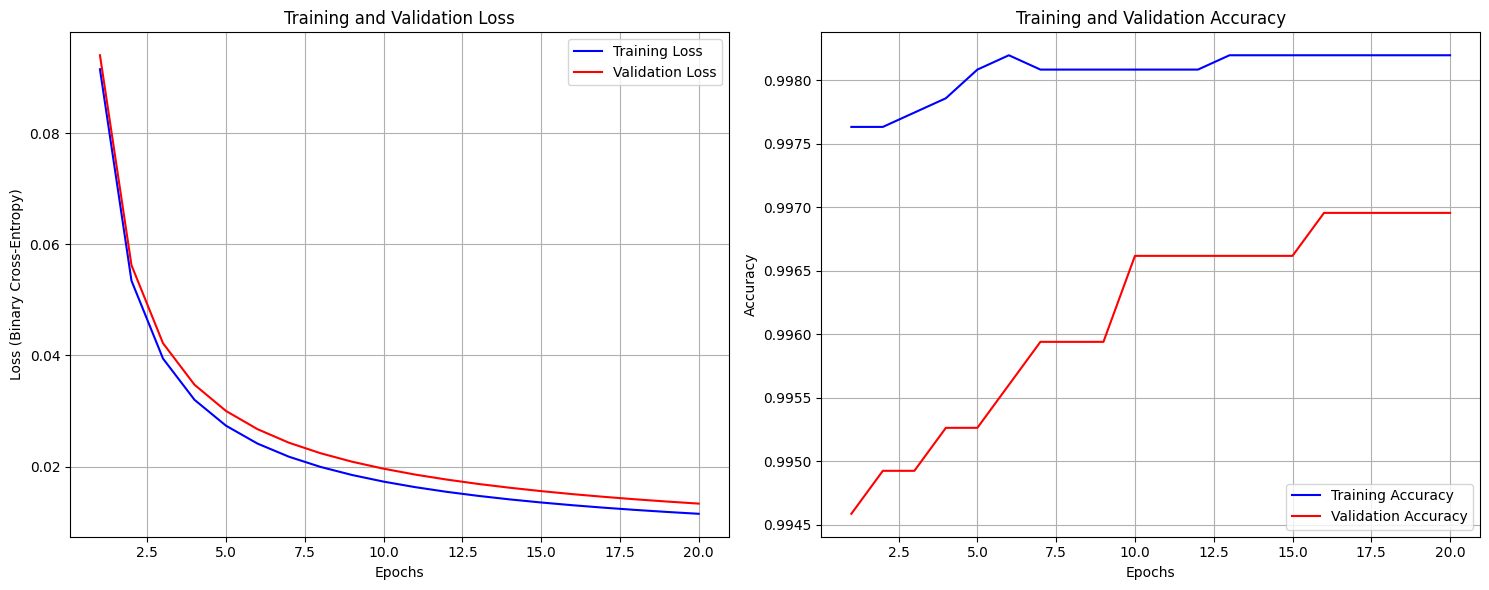


Final Test Accuracy: 99.76%


/tmp/ipykernel_32725/2451544140.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 1.0 / (1.0 + np.exp(-z))


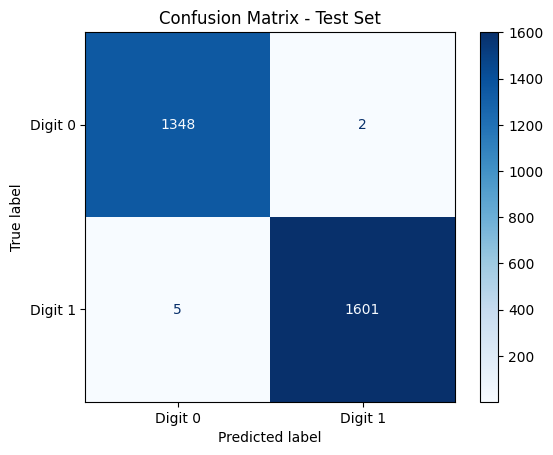

In [8]:
# Create a 1x2 grid of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
epochs = range(1, len(cost_history) + 1)

# --- Plot 1: Loss Curves ---
ax1.plot(epochs, cost_history, 'b-', label='Training Loss')
ax1.plot(epochs, val_cost_history, 'r-', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (Binary Cross-Entropy)')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Accuracy Curves ---
ax2.plot(epochs, acc_history, 'b-', label='Training Accuracy')
ax2.plot(epochs, val_acc_history, 'r-', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


# --- Final Evaluation on Test Set ---

# Calculate final test accuracy using the best weights
test_accuracy = compute_accuracy(X_test_tensor, y_test_tensor, w, b)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")

# --- Generate Confusion Matrix ---

# Get predictions on the test set
y_probs_test = compute_predictions(X_test_tensor, w, b)
y_preds_test = torch.round(y_probs_test)

# Convert tensors to NumPy arrays for scikit-learn
t_test_np = y_test_tensor.numpy()
y_preds_np = y_preds_test.numpy()

# Generate the confusion matrix
cm = confusion_matrix(t_test_np, y_preds_np)
display_labels = ['Digit 0', 'Digit 1']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()